# Homework I

### Grupo 003

(ist1107028) Inês Paredes

(ist1107137) Margarida Lourenço


## II. Programming [9v]

Consider the diabetes.arff data available at the homework tab, comprising 8 biological
features to classify 768 patients into 2 classes (normal, diabetes).

**1) [1v] ANOVA is a statistical test that can be used to assess the discriminative power of a
single input variable. Using f_classif from sklearn, identify the input variables with the
worst and best discriminative power. Plot their class-conditional probability density
functions.**

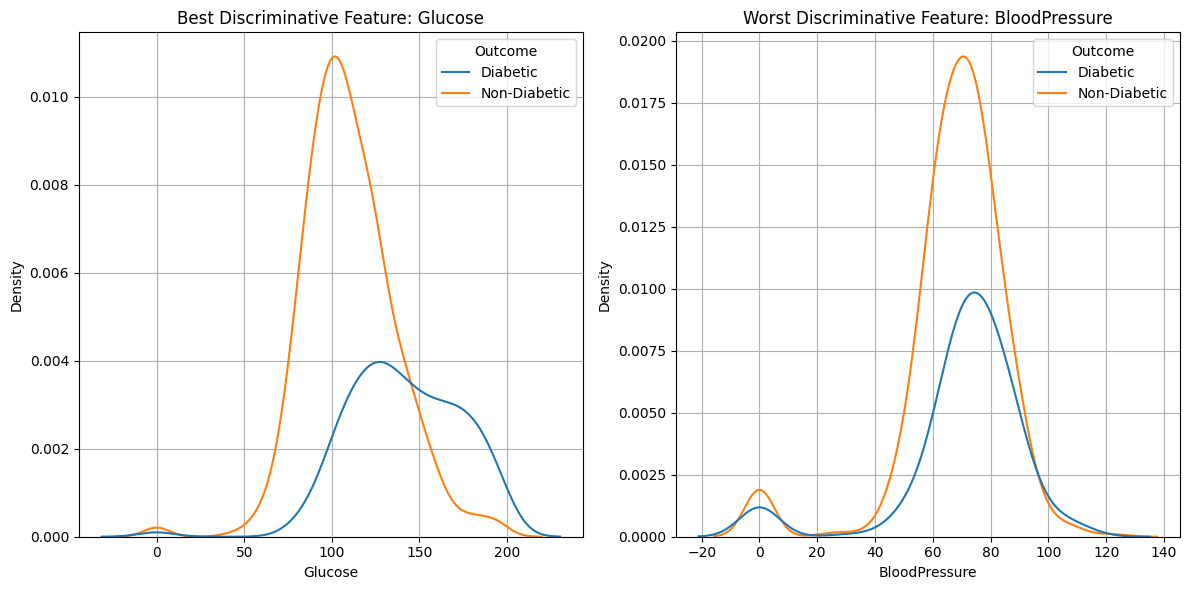

In [14]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from scipy.io.arff import loadarff
from sklearn.feature_selection import f_classif

# Load the dataset
data = loadarff('./diabetes.arff')
df = pd.DataFrame(data[0])

# Separate features and target variable
df["Outcome"] = df["Outcome"].str.decode("utf-8")
X, y = df.drop("Outcome", axis=1), df["Outcome"]
df["Outcome"] = df["Outcome"].map({'1': 'Diabetic', '0': 'Non-Diabetic'})

# Compute ANOVA F-values
f_values, p_values = f_classif(X, y)

# Find best and worst discriminative features
best_feature = X.columns[f_values.argmax()]
worst_feature = X.columns[f_values.argmin()]

# Plot class-conditional density plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x=best_feature, hue='Outcome', fill=False)
plt.title(f'Best Discriminative Feature: {best_feature}')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x=worst_feature, hue='Outcome', fill=False)
plt.title(f'Worst Discriminative Feature: {worst_feature}')
plt.grid(True)
plt.tight_layout()
plt.show()

**2) [4v] Using a stratified 80-20 training-testing split with a fixed seed (random_state=1),
assess in a single plot both the training and testing accuracies of a decision tree with
minimum sample split in {2, 5, 10, 20, 30, 50, 100} and the remaining parameters as default.**

*[optional] Note that split thresholding of numeric variables in decision trees is non-
deterministic in sklearn, hence you may opt to average the results using 10 runs per
parameterization.*

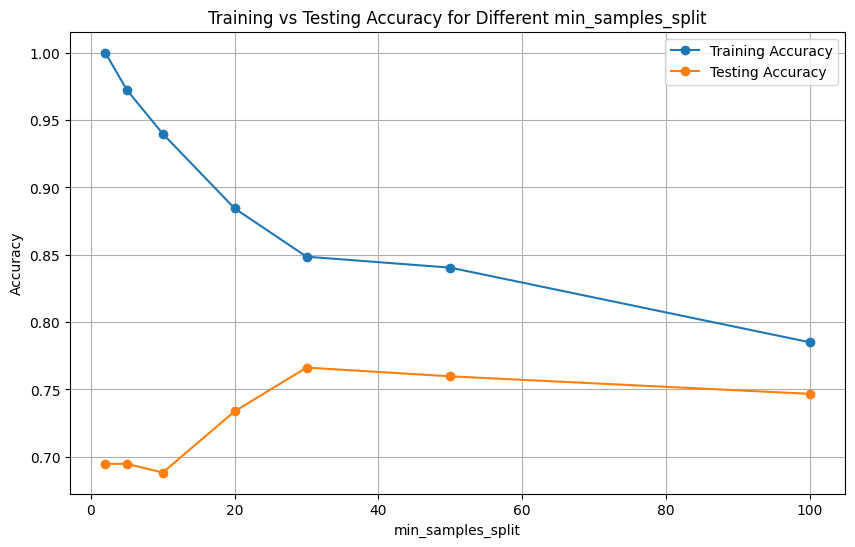

In [11]:
from scipy.io.arff import loadarff
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
data = loadarff('./diabetes.arff')
df = pd.DataFrame(data[0])

# Separate features and target variable
df["Outcome"] = df["Outcome"].str.decode("utf-8")
X, y = df.drop("Outcome", axis=1), df["Outcome"]
df["Outcome"] = df["Outcome"].map({'1': 'Diabetic', '0': 'Non-Diabetic'})

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

# Parameters to try for min_samples_split
min_samples_splits = [2, 5, 10, 20, 30, 50, 100]
train_acc, test_acc = [], []

for min_samples in min_samples_splits:
    clf = DecisionTreeClassifier(min_samples_split=min_samples, random_state=1)
    clf.fit(X_train, y_train)

    # Calculate training and testing accuracy
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(min_samples_splits, train_acc, label='Training Accuracy', marker='o')
plt.plot(min_samples_splits, test_acc, label='Testing Accuracy', marker='o')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Testing Accuracy for Different min_samples_split')
plt.grid(True)
plt.show()

**3) [2v] Critically analyze these results, including the generalization capacity across settings.**

As we can observe in the graphic above, as the depth of the decision tree increases, the acurracy drops by around 20%. 
Usually, deeper trees are more complex, which allows them to better fit the training data, leading to higher accuracy when evaluated on the dataset. However, in this particular case, a more complex tree might be capturing noise or irrelevant patterns in the training data, leading to overfitting. The possibility of the tree failing to generalize well within the training set could be the cause of this decrease, indicating a poor fit to the data, potentially due to noise or randomness in the model-building process. Pruning or limiting the depth of the tree could be possible solutions to fight this issue.

As for the testing accuracy, we can see that during a short initial interval it reduces very little. This fall does not seem to be very relevant since the difference between the values is quite small. Right after it, the testing accuracy begins to increase until 75%-80%, indicating improved generalization. However, as it reaches a certain depth level, it starts to decline once more. Thus, we infer that there is a reduction in generalization ability due to overfitting. This indicates that excessively complex decision trees may capture noise in the training data, leading to poor performance on new, unseen data.

The ideal depth appears to be around 30, which is the point in the graphic where the testing acurracy reaches it's maximum, striking a balance between model complexity and generalization to new data. This would help us prevent the model from being to minimalistic (*underfitting*) or overly complex (*overfitting*).



**4) [2v] To deploy the predictor, a healthcare provider opted to learn a single decision tree
(random_state=1) using all available data and ensuring that the maximum depth would be 3
in order to avoid overﬁtting risks.**

**i. Plot the decision tree.**

**ii. Explain what characterizes diabetes by identifying the conditional associations
together with their posterior probabilities.**

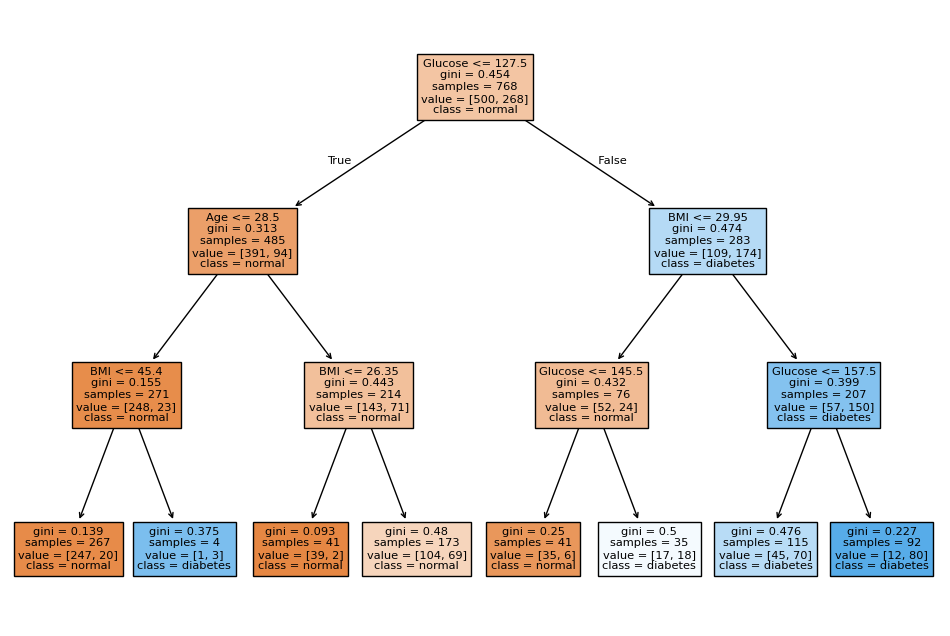

Feature Importance:
Glucose                     0.626965
BMI                         0.251854
Age                         0.121181
Pregnancies                 0.000000
SkinThickness               0.000000
BloodPressure               0.000000
Insulin                     0.000000
DiabetesPedigreeFunction    0.000000
dtype: float64


In [17]:
from scipy.io.arff import loadarff
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Load the dataset
data = loadarff('./diabetes.arff')
df = pd.DataFrame(data[0])

# Separate features and target variable
df["Outcome"] = df["Outcome"].str.decode("utf-8")
X, y = df.drop("Outcome", axis=1), df["Outcome"]
df["Outcome"] = df["Outcome"].map({'1': 'Diabetic', '0': 'Non-Diabetic'})

# Train a decision tree with max_depth=3
clf = DecisionTreeClassifier(max_depth=3, random_state=1)
clf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=['normal', 'diabetes'], filled=True, rounded=True)
plt.show()

# REMOVE IN FINAL VERSION, JUST TO TAKE CONCLUSIONS
# Extract feature importance and posterior probabilities 
feature_importance = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print('Feature Importance:')
print(feature_importance)

# Posterior probabilities for predictions
y_prob = clf.predict_proba(X)
